In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
import random
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib as mpl
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree._tree import TREE_LEAF

# Processing Data and PCA
Store training and test data in separate numpy arrays and normalize the data for PCA. We will conduct PCA with n principal components that explain at least 95% of the variance in the data. We are using PCA for dimension reduction to increase computational efficiency while still retaining most of the information contained in the data, hence we are looking for at least 95% explained variance.

In [ ]:
train_data = np.genfromtxt('emnist-letters-train.csv', delimiter = ',')
test_data = np.genfromtxt('emnist-letters-test.csv', delimiter = ',')
train_label = train_data[:, 0]
train_features = preprocessing.normalize(train_data[:, 1:])
test_label = test_data[:, 0]
test_features = preprocessing.normalize(test_data[:, 1:])
pcomp = list(range(1,140,10))
var_exp = []
for n in pcomp:
    pca = PCA(n_components=n)
    pca_result = pca.fit_transform(train_features)
    var_exp.append(np.sum(pca.explained_variance_ratio_))
plt.plot(pcomp, var_exp)
plt.title("Principal Components vs. Explained Variance Ratio")
plt.xlabel("Principal Components")
plt.ylabel("Explained Variance Ratio")
plt.show()
    
pca = PCA(n_components=130)
pca_result = pca.fit_transform(train_features)
test_pca = pca.transform(test_features)
print(np.sum(pca.explained_variance_ratio_)*100,"% of the variance is explained by 130 principal components.", sep="")

# Decision Tree Classifier
Through K-Fold cross validation and GridSearchCV, the Decision Tree classifier finds the optimal parameters that yields the highest accuracy.

In [9]:
paramdict = {'max_depth': np.arange(1,30)}
grid = GridSearchCV(tree.DecisionTreeClassifier(), paramdict, cv=5,
    scoring='accuracy')
grid.fit(pca_result, train_label)
print("Best value of max depth is", grid.best_params_, "with an accuracy of", grid.best_score_)
val_scores = [par for par in grid.cv_results_['mean_test_score']]
predict = grid.predict(test_pca)
determineAccuracy("Decision Tree", predict)

Best value of max depth is {'max_depth': 19} with an accuracy of 0.617623873874
Decision Tree  Accuracy =  0.602027027027027


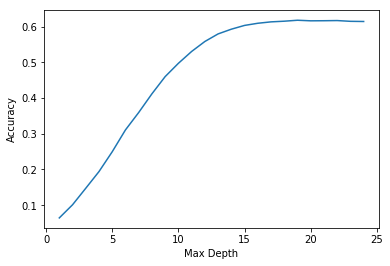

In [60]:
plt.plot(np.arange(1,25), val_scores)
plt.xlabel("Max Depth")
plt.title("Decision Tree Parameters' Accuracies")
plt.ylabel("Accuracy")
plt.show()

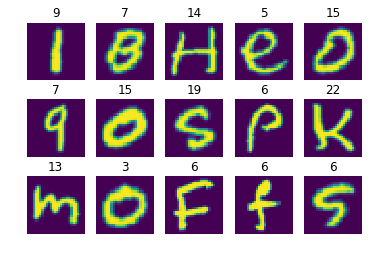

In [103]:
plot_samples(grid)

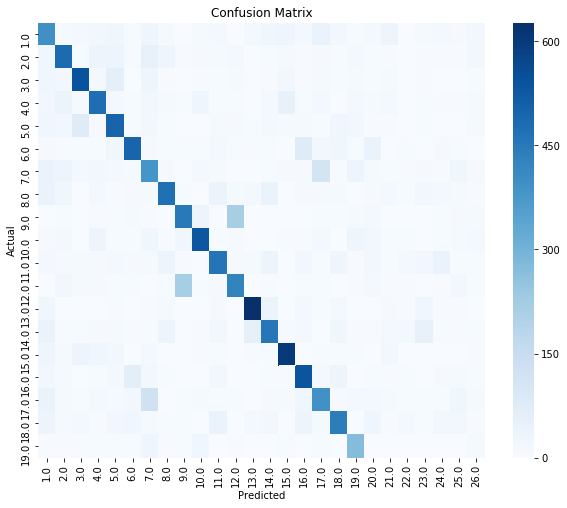

In [104]:
graph_cfmat(predict)

# Optimizing Decision Tree Classifier with Ensemble Learning (Random Forest Classifier)

In [ ]:
paramdict = {'n_estimators': np.arange(10, 30, 5), 'max_features': ['auto', 'sqrt', 'log2']}
grid = GridSearchCV(RandomForestClassifier(), paramdict, cv= 5)
grid.fit(pca_result, train_label)
print("Best parameters are", grid.best_params_, "with an accuracy of", grid.best_score_)
val_scores = [par for par in grid.cv_results_['mean_test_score']]
predict = grid.predict(test_pca)
determineAccuracy("Decision Tree", predict)

(88800, 130)


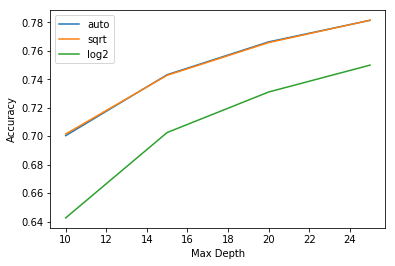

In [28]:
df = pd.DataFrame(grid.cv_results_)
val = ['params', 'mean_test_score']
df = df[val]
plt.plot(np.arange(10, 30, 5), val_scores[0:4], label="auto")
plt.plot(np.arange(10, 30, 5), val_scores[4:8], label="sqrt")
plt.plot(np.arange(10, 30, 5), val_scores[8:], label='log2')
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

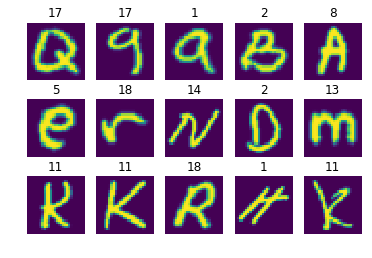

In [29]:
plot_samples(grid)

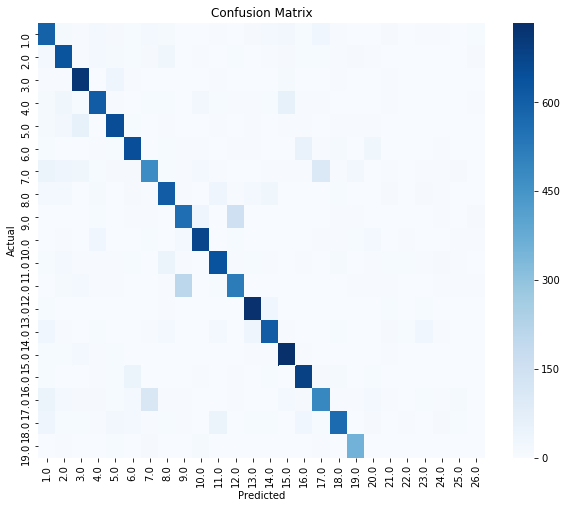

In [30]:
graph_cfmat(predict)

# KNN Classifier
Similarly from Decision Tree Classifier, conduct K-Fold cross validation and GridSearchCV to find the optimal parameters that yields the highest accuracy. 

In [4]:
k_range = range(5, 10)
param_dict = dict(n_neighbors=k_range)
grid = GridSearchCV(KNeighborsClassifier(), param_dict, cv=3, scoring='accuracy')
grid.fit(pca_result, train_label)
print("Best parameters are", grid.best_params_, "with an accuracy of", grid.best_score_)
val_scores = [par for par in grid.cv_results_['mean_test_score']]
predict = grid.predict(test_pca)
determineAccuracy("KNN", predict)

Best parameters are {'n_neighbors': 5} with an accuracy of 0.870022522523
KNN  Accuracy =  0.8662837837837838


C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\model_selection\_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


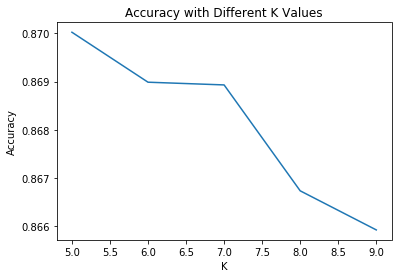

In [13]:
val_scores = [i.mean_validation_score for i in grid.grid_scores_]
plt.plot(k_range, val_scores)
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.title("Accuracy with Different K Values")
plt.show()

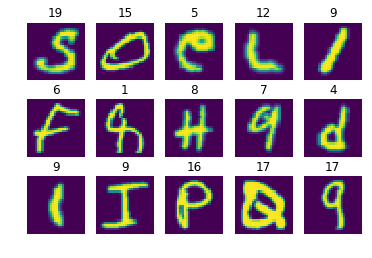

In [6]:
plot_samples(grid)

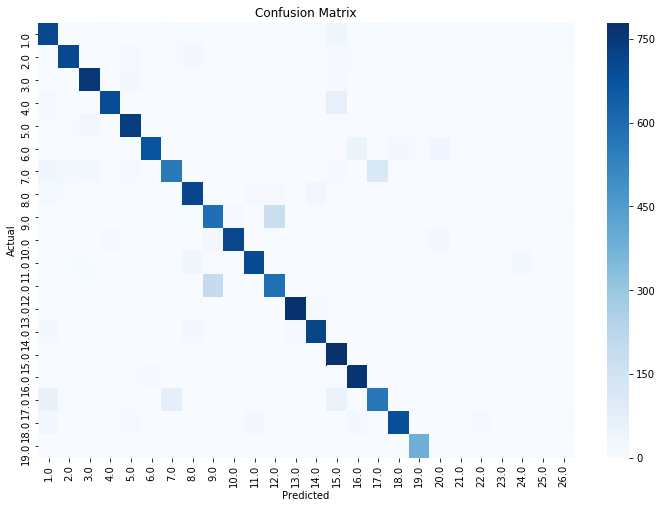

In [11]:
graph_cfmat(predict)

# Using t-SNE to Visualize High-Dimensional Data
Utilize t-SNE in order to visualize data with high feature dimensions. Conduct PCA first to reduce dimensions to 40 principal components and then transform resulting data using t-SNE to visualize data in 2-D space. Use a random sample of 15,000 data points, as using the entire data set is too computationally expensive.

In [52]:
tsne = TSNE(n_components=2, verbose=1, perplexity=50, learning_rate=200, n_iter=1000)
sampleint = [random.randint(0, train_label.size-1) for i in range(20000)]
tsne_results = tsne.fit_transform(pca_result[sampleint])
x_tsne = tsne_results[:,0]
y_tsne = tsne_results[:,1]
df = pd.DataFrame({'x_tsne': x_tsne, 'y_tsne': y_tsne, 'label': train_label[sampleint]})

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 20000 samples in 0.415s...
[t-SNE] Computed neighbors for 20000 samples in 130.377s...
[t-SNE] Computed conditional probabilities for sample 1000 / 20000
[t-SNE] Computed conditional probabilities for sample 2000 / 20000
[t-SNE] Computed conditional probabilities for sample 3000 / 20000
[t-SNE] Computed conditional probabilities for sample 4000 / 20000
[t-SNE] Computed conditional probabilities for sample 5000 / 20000
[t-SNE] Computed conditional probabilities for sample 6000 / 20000
[t-SNE] Computed conditional probabilities for sample 7000 / 20000
[t-SNE] Computed conditional probabilities for sample 8000 / 20000
[t-SNE] Computed conditional probabilities for sample 9000 / 20000
[t-SNE] Computed conditional probabilities for sample 10000 / 20000
[t-SNE] Computed conditional probabilities for sample 11000 / 20000
[t-SNE] Computed conditional probabilities for sample 12000 / 20000
[t-SNE] Computed conditional probabilities for 

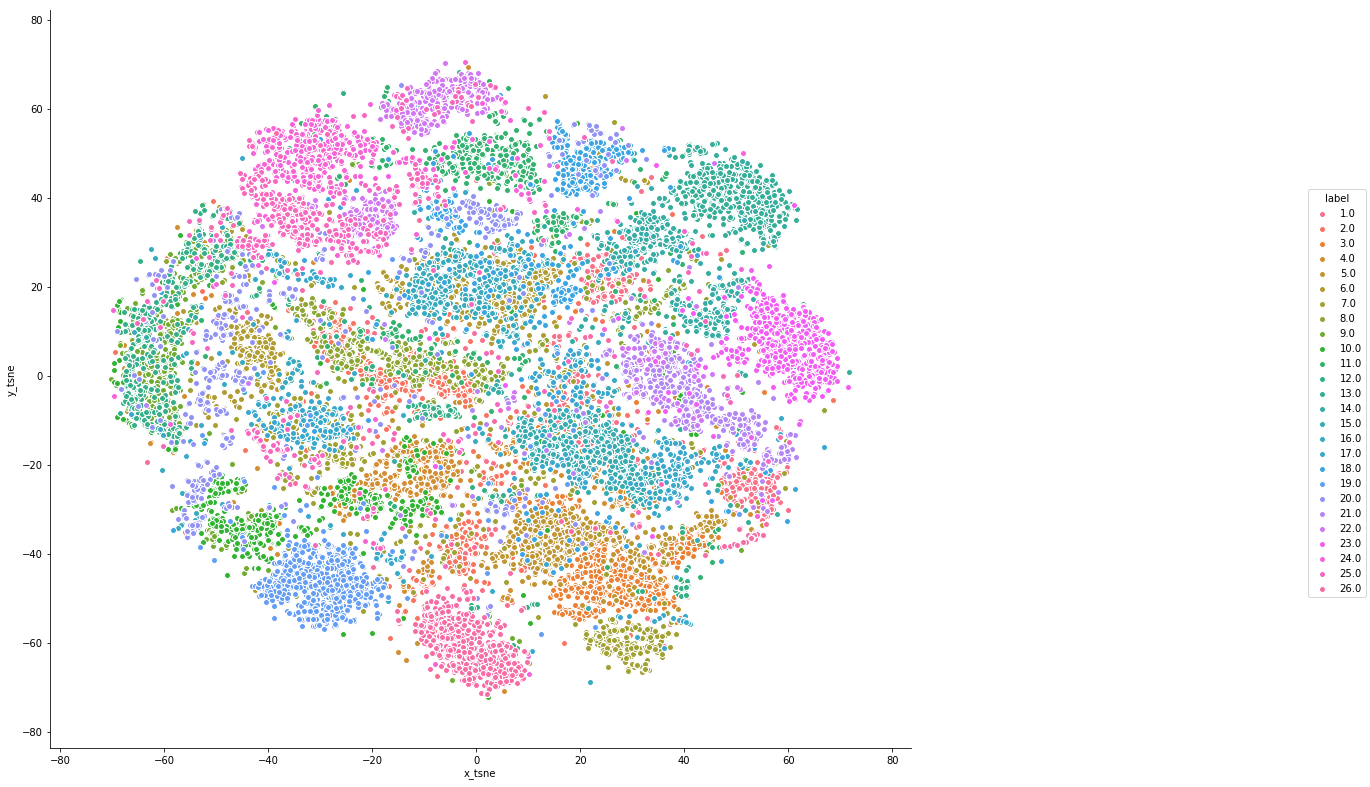

In [108]:
fig = sns.pairplot(x_vars=['x_tsne'], y_vars=['y_tsne'], data=df, hue='label')
fig.fig.set_size_inches(25,15)
plt.show()

In [25]:
ind1 = np.where(np.logical_or(train_label==7.0, train_label==17.0))
ind2 = np.where(np.logical_or(train_label==9, train_label==11))
y1 = train_label[ind1]
y2 = train_label[ind2]
x1 = pca_result[ind1]
x2 = pca_result[ind2]
x_pca = np.concatenate((x1, x2))
y_pca = np.concatenate((y1, y2))

tsne = TSNE(n_components=2, verbose=1, perplexity=50, learning_rate=200, n_iter=1000)
tsne_results = tsne.fit_transform(x_pca)
x_tsne = tsne_results[:,0]
y_tsne = tsne_results[:,1]
df = pd.DataFrame({'x_tsne': x_tsne, 'y_tsne': y_tsne, 'label': y_pca})

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 13686 samples in 0.205s...
[t-SNE] Computed neighbors for 13686 samples in 62.026s...
[t-SNE] Computed conditional probabilities for sample 1000 / 13686
[t-SNE] Computed conditional probabilities for sample 2000 / 13686
[t-SNE] Computed conditional probabilities for sample 3000 / 13686
[t-SNE] Computed conditional probabilities for sample 4000 / 13686
[t-SNE] Computed conditional probabilities for sample 5000 / 13686
[t-SNE] Computed conditional probabilities for sample 6000 / 13686
[t-SNE] Computed conditional probabilities for sample 7000 / 13686
[t-SNE] Computed conditional probabilities for sample 8000 / 13686
[t-SNE] Computed conditional probabilities for sample 9000 / 13686
[t-SNE] Computed conditional probabilities for sample 10000 / 13686
[t-SNE] Computed conditional probabilities for sample 11000 / 13686
[t-SNE] Computed conditional probabilities for sample 12000 / 13686
[t-SNE] Computed conditional probabilities for s

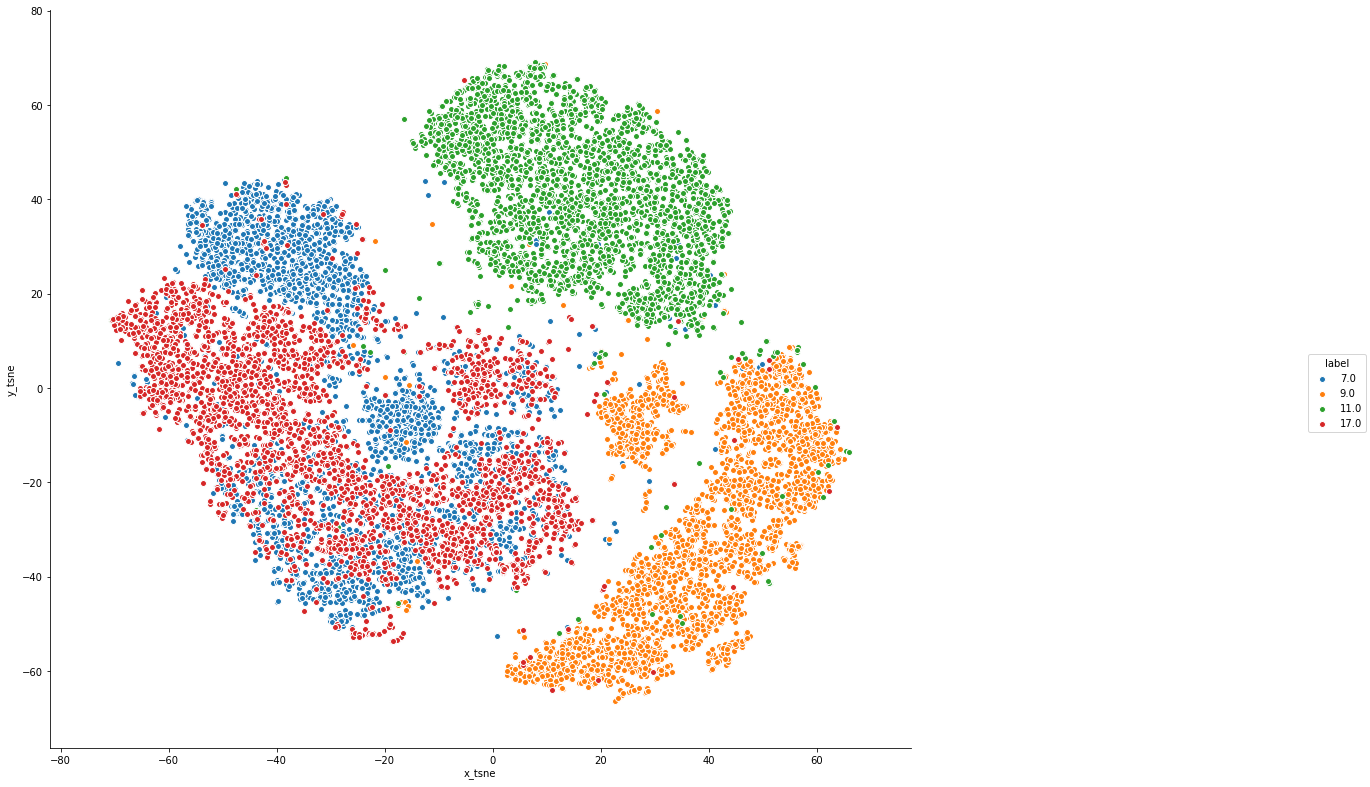

In [29]:
fig = sns.pairplot(x_vars=['x_tsne'], y_vars=['y_tsne'], data=df, hue='label')
fig.fig.set_size_inches(25,15)
plt.show()

# Helper Functions
Determines accuracy of classifier, plots confusion matrix, and plots samples from testing data based on the classifier.

In [ ]:
def determineAccuracy(clf, prediction):
    correct = 0
    for i in range(0,test_label.size):
        if test_label[i]==prediction[i]:
            correct+=1
    print(clf, " Accuracy = ", correct/test_label.size)
    
def graph_cfmat(predict):
    y_true = pd.Series(test_label, name='Actual')
    y_pred = pd.Series(predict, name='Predicted')
    df_confusion = pd.crosstab(y_true, y_pred)
    fig, ax = plt.subplots()
    fig.set_size_inches(12, 8)
    fig = sns.heatmap(df_confusion, cmap="Blues", ax=ax, annot=False)
    plt.title("Confusion Matrix")
    plt.show()
    
def plot_samples(clf):
    sampleint = [random.randint(0, test_label.size) for i in range(15)]
    
    for i in range(len(sampleint)):
        plt.subplot(3, 5, i+1)
        plt.imshow(np.transpose((test_data[sampleint[i]])[1:].reshape((28,28))))
        plt.axis('off')
        title = clf.predict([test_pca[sampleint[i]]])
        plt.title(int(title[0]))
    plt.show()